## Ingest scraped data

In [ ]:
import pandas as pd
import numpy as np
indeed_df = pd.read_csv('indeed/data/indeed_spider.csv')

##  Create a column on which to perform analysis from the Job Descriptions

In [5]:
import nltk
from textblob import TextBlob

In [6]:
indeed_df['job_description_analysis'] = indeed_df['job_description'].str.lower()
indeed_df['job_description_analysis'] = indeed_df['job_description_analysis'].apply(lambda row: TextBlob(row).words)

### Remove irrelevant words from being considered

In [124]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
additional_stop_words = ['business','new','team','company','equal','opportunity','gender','orientation',
                        'religion','sex','national','origin','sexual','identity','marital','status','race',
                        'color','employee','work','experience','product','role', 'organization', 'job',
                        'description', 'age', 'disability', 'use']
stop.extend(additional_stop_words)
indeed_df['job_description_analysis'] = indeed_df['job_description_analysis'].apply(lambda row: 
                                                                                   [wd for wd in row if wd not in stop])

## Produce a Na&#239;ve Word Cloud

## Filter out non-Nouns (NN)

In [125]:
from nltk import pos_tag
from nltk.stem import PorterStemmer

indeed_df['parts_of_speech'] = indeed_df['job_description_analysis'].apply(lambda wd: pos_tag(wd)) 

In [126]:
indeed_df['relevant_words'] = indeed_df['parts_of_speech'].apply(lambda row: [wd[0] for wd in row if wd[1] in ['NN']])

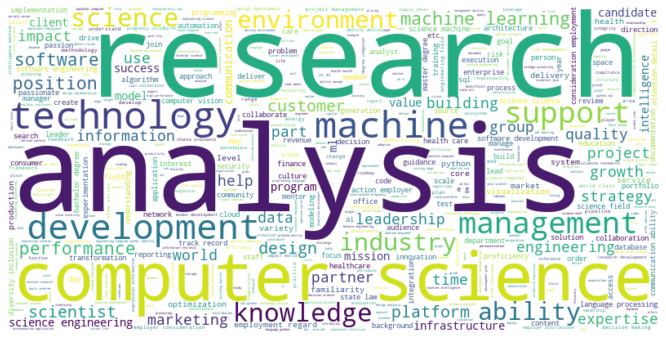

In [127]:
indeed_df['words_for_WC'] = indeed_df['relevant_words'].apply(lambda row: ' '.join(row))
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(indeed_df['words_for_WC']))
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Set up keywords for search

### Educational Levels

In [208]:
degree_dict = {'bs': 1, 'bachelor': 1, 'bachelors': 1, 'undergraduate': 1, 
               'master': 2, 'graduate': 2, 'mba': 2, 
               'phd': 3, 'ba': 1, 'ma': 2, 'ms': 2, 'msc': 2,
               'postdoctoral': 4, 'postdoc': 4, 'doctorate': 3}

degree_phrases = {'advanced degree': 2, 'ms degree': 2, '4 year degree': 1, 'ph.d': 3, 
                  '4-year degree': 1, 'b.s.': 1, 'm.s.': 2, 'm.s': 2, 'b.s': 1, 'ph.d.': 3,
                  'm.s': 2, 'm.s.': 2, 'master\'s': 2, 'bachelor\'s': 1, 'post-doc': 4, 'post doc': 4}

degree_keywords_set = set(degree_dict.keys())

###  Tools Used

In [209]:
tool_keywords = ['airflow', 'angular', 'aws', 'azure', 'bigquery', 'bigtable', 'birt', 'bokeh', #'c',
     'caffe', 'cassandra', 'clojure', 'cloud', 'cntk', 'cognos', 'd3', 'dash', 'dask', 
     'django', 'docker', 'ec2', 'einstein', 'elasticsearch', 'excel', 'firebase', 'flask', 'gcp', 'git',
     'github', 'go', 'h20', 'h2o', 'hadoop', 'hana', 'hbase', 'hive', 'java', 'javascript', 'jquery',
     'julia', 'jupyter', 'kafka', 'keras', 'kubeflow', 'kubernetes', 'lambda', 'lightgbm', 'linux',
     'looker', 'mahout', 'mapreduce', 'mariadb', 'matlab', 'matplotlib', 'mlflow', 'mllib', 'mongodb', 'mxnet',
     'mysql', 'net', 'nltk', 'node', 'nodejs', 'nosql', 'numpy', 'oracle', 'pandas', 'pentaho', 'perl',
     'php', 'pig', 'plotly', r'pl/sql', 'postgres', 'postgresql', 'postgressql', 'powerbi', 'powerpoint',
     'pyspark', 'python', 'pytorch', 'qlik', 'r', 'rapidminer', 'react', 'redshift', 'rpython',
     'rstudio', 'ruby', 'rust', 's3', 'sagemaker', 'salesforce', 'sas', 'scala', 'scala', 'scikit',
     'scikitlearn', 'scipy', 'seaborn', 'shiny', 'sklearn', 'snowflake', 'solr', 'spacy', 'spark',
     'splunk', 'spss', 'sql', 'ssrs', 'swift', 'tableau', 'tensor', 'tensorflow', 'tf', 'theano', 
     'torch', 't-sql', 'unix', 'unixlinux', 'vba', 'xgboost',
     # added r packages doesn't seem to impact the result
     'dplyr','ggplot2','esquisse','bioconductor','shiny','lubridate','knitr','mlr','quanteda','dt','rcrawler','caret','rmarkdown',
     'leaflet','janitor','ggvis','plotly','rcharts','rbokeh','broom','stringr','magrittr','slidify','rvest',
     'rmysql','rsqlite','prophet','glmnet','text2vec','snowballc','quantmod','rstan','swirl','datasciencer']

tool_phrases = ['amazon web services', 'c#', 'c++', 'google cloud', 'microsoft access', 'sql server']

tool_keywords_set = set(tool_keywords).union(set(tool_phrases))

### Skills Required

In [210]:
skill_keywords = set(['ai', 'anomaly', 'bandit', 'bayes', 'bayesian', 'bioinformatics', 'biostatistics', 
 'blockchain', 'boosting', 'causality', 'chatbot', 'chi', 'classification', 'cleaning', 'cleansing',
 'cluster', 'clustering', 'cnn', 'convolutional', 'correlation', 'dashboard', 'econometrics',
 'etl', 'exploratory', 'forecasting', 'gbm', 'geospatial', 'gis', 'glm', 'graph', 'hyperparameter',
 'hypothesis', 'kaggle', 'knn', 'kpi', 'logistic', 'lstm', 'ml', 'nlp', 'nn', 'normalization', 'ocr',
 'optimization', 'optimizing', 'outlier', 'pca', 'prediction', 'probability', 'recommendations',
 'recommender', 'recurrent', 'regression', 'reinforcement', 'research', 'rnn', 'salesforce',
 'salesforcecom', 'sdlc', 'segmentation', 'sequencing', 'statistics', 'supervised', 'svd', 'svm', 'tuning',
 'unsupervised', 'visualization'])

skill_phrases = ['a/b testing', 'ab testing', 'artificial intelligence', 'chat bot', 
 'computer vision', 'data mining', 'decision tree', 'deep learning', 'dimensionality reduction', 
 'experimental design', 'machine learning', 'machine vision', 'natural language processing', 
 'nearest neighbors', 'neural network', 'power bi', 'random forest', 'software development life cycle',
 'support vector machine', 'text analytics', 'time series']

skill_keywords_set = set(skill_keywords).union(set(skill_phrases))

## Assemble counts

In [211]:
tool_list = []
skill_list = []
degree_list = []

num_postings = len(indeed_df.index)
for i in range(num_postings):
    job_desc = indeed_df.iloc[i]['job_description'].lower()
    job_desc_set = indeed_df.iloc[i]['job_description_analysis']
    
    # check if the keywords are in the job description. Look for exact match by token.
    tool_words = tool_keywords_set.intersection(job_desc_set)
    skill_words = skill_keywords_set.intersection(job_desc_set)
    degree_words = degree_keywords_set.intersection(job_desc_set)
    
    # check if longer keywords (more than one word) are in the job description. Match by substring.
    j = 0
    for tool_phrase in tool_phrases:
        # tool keywords.
        if tool_phrase in job_desc:
            tool_list.append(tool_phrase)
            j += 1
    
    k = 0
    for skill_phrase in skill_phrases:
        # skill keywords.
        if skill_phrase in job_desc:
            skill_list.append(skill_phrase)
            k += 1
    
    # search for the minimum education.
    min_education_level = 999
    for degree_word in degree_words:
        level = degree_dict[degree_word]
        min_education_level = min(min_education_level, level)
        
    for degree_phrase in degree_phrases:
        # longer keywords. Match by substring.
        if degree_phrase in job_desc:
            level = degree_phrases[degree_phrase]
            min_education_level = min(min_education_level, level)
    
    # label the job descriptions without any tool keywords.
    if len(tool_words) == 0 and j == 0:
        tool_list.append('nothing specified')        
        
    # label the job descriptions without any skill keywords.
    if len(skill_words) == 0 and k == 0:
        skill_list.append('nothing specified')
    
    # If none of the keywords were found, but the word degree is present, then assume it's a bachelors level.
    if min_education_level > 500:
        if 'degree' in job_desc:
            min_education_level = 1
        else:
            min_education_level = 0
    
    tool_list += list(tool_words)
    skill_list += list(skill_words)
    degree_list.append(min_education_level)

## Consolidate synonymous tools

In [212]:
# create the list of tools.
df_tool = pd.DataFrame(data={'cnt': tool_list})

msk = np.logical_or(df_tool['cnt'] == 't-sql', df_tool['cnt']=='pl/sql')
df_tool.loc[msk, 'cnt'] = 'sql'

msk = np.logical_or(df_tool['cnt'] == 'scikit', df_tool['cnt'] == 'scikitlearn')
df_tool.loc[msk,'cnt'] = 'sklearn'

msk = np.logical_or(df_tool['cnt'] == 'tensor', df_tool['cnt']=='tf')
df_tool.loc[msk, 'cnt'] = 'tensorflow'

msk = df_tool['cnt'] == 'amazon web services'
df_tool.loc[msk, 'cnt'] = 'aws'

msk = df_tool['cnt'] == 'rstudio'
df_tool.loc[msk, 'cnt'] = 'r'

msk = df_tool['cnt'] == 'vba'
df_tool.loc[msk, 'cnt'] = 'excel'

msk = df_tool['cnt'] == 'h2o'
df_tool.loc[msk, 'cnt'] = 'h20'

msk = df_tool['cnt'] == 'github'
df_tool.loc[msk, 'cnt'] = 'git'

msk = df_tool['cnt'] == 'pytorch'
df_tool.loc[msk, 'cnt'] = 'torch'

msk = df_tool['cnt'] == 'pyspark'
df_tool.loc[msk, 'cnt'] = 'spark'

msk = df_tool['cnt'] == 'gcp'
df_tool.loc[msk, 'cnt'] = 'google cloud'

df_tool_top50 = df_tool['cnt'].value_counts().reset_index().rename(columns={'index': 'tool'}).iloc[:20]

## Chart the Top 20 Tools

In [217]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

layout = dict(
    title='Tools For Data Scientists',
    yaxis=dict(
        title='% of job postings',
        tickformat=',.0%',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=df_tool_top50['tool'],
    y=df_tool_top50['cnt']/num_postings
))

iplot(fig)

In [214]:
# create the list of tools.
df_skill = pd.DataFrame(data={'cnt': skill_list})

msk = df_skill['cnt'] == 'ml'
df_skill.loc[msk, 'cnt'] = 'machine learning'

msk = df_skill['cnt'] == 'ai'
df_skill.loc[msk, 'cnt'] = 'artificial intelligence'

msk = df_skill['cnt'] == 'nlp'
df_skill.loc[msk, 'cnt'] = 'natural language processing'

df_skill_topN = df_skill['cnt'].value_counts().reset_index().rename(columns={'index': 'skill'}).iloc[:20]

In [215]:
layout = dict(
    title='Skills For Data Scientists',
    yaxis=dict(
        title='% of job postings',
        tickformat=',.0%',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=df_skill_topN['skill'],
    y=df_skill_topN['cnt']/num_postings
))

iplot(fig)

In [216]:
df_education = pd.DataFrame(data={'cnt': degree_list})
df_education_topN = df_education['cnt'].value_counts().reset_index().rename(columns={'index': 'degree'}).iloc[:20]
df_education_topN['min degree'] = df_education_topN['degree'].replace(
    {0:'None Specified', 1:'Bachelors', 2:'Masters', 3:'Doctorate', 4:'Post-Doc'})
df_education_topN.sort_values('degree')

layout = dict(
    title='Minimum Education For Data Scientists',
    yaxis=dict(
        title='% of job postings',
        tickformat=',.0%',
    )
)

fig = go.Figure(layout=layout)
fig.add_trace(go.Bar(
    x=df_education_topN['min degree'],
    y=df_education_topN['cnt']/num_postings
))

iplot(fig)